In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('dataset_phishing.csv')  # Replace with the actual path of your dataset
print(data.head())
data.info()
data.describe()
data.isnull().sum()

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [4]:
import re
from urllib.parse import urlparse

# Function to extract features from a given URL
def extract_features(url):
    parsed_url = urlparse(url)
    hostname = parsed_url.hostname if parsed_url.hostname else ""
    path = parsed_url.path if parsed_url.path else ""

    # Split the URL, hostname, and path into words
    words_raw = re.split(r'\W+', url)
    words_host = re.split(r'\W+', hostname)
    words_path = re.split(r'\W+', path)

    # Feature extraction
    features = {}

    # Length features
    features['length_url'] = len(url)
    features['length_hostname'] = len(hostname)

    # IP address check
    features['ip'] = 1 if re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$', hostname) else 0

    # Character counts
    features['nb_dots'] = url.count('.')
    features['nb_hyphens'] = url.count('-')
    features['nb_at'] = url.count('@')
    features['nb_qm'] = url.count('?')
    features['nb_and'] = url.count('&')
    features['nb_eq'] = url.count('=')
    features['nb_underscore'] = url.count('_')
    features['nb_tilde'] = url.count('~')
    features['nb_percent'] = url.count('%')
    features['nb_slash'] = url.count('/')
    features['nb_star'] = url.count('*')

    # HTTPS token check
    features['https_token'] = 1 if 'https' in parsed_url.scheme else 0

    # Subdomain count
    features['nb_subdomains'] = hostname.count('.') - 1 if hostname.count('.') > 1 else 0

    # Ratio of digits in the URL
    features['ratio_digits_url'] = sum(c.isdigit() for c in url) / len(url) if len(url) > 0 else 0

    # Redirection features
    features['nb_redirection'] = url.count('>')
    features['nb_external_redirection'] = url.count('//')

    # Word length and repetition features
    features['length_words_raw'] = len(words_raw)
    features['char_repeat'] = max([words_raw.count(word) for word in words_raw]) if words_raw else 0
    features['shortest_word_raw'] = min(len(word) for word in words_raw) if words_raw else 0
    features['shortest_word_host'] = min(len(word) for word in words_host) if words_host else 0
    features['shortest_word_path'] = min(len(word) for word in words_path) if words_path else 0
    features['longest_word_raw'] = max(len(word) for word in words_raw) if words_raw else 0
    features['longest_word_host'] = max(len(word) for word in words_host) if words_host else 0
    features['longest_word_path'] = max(len(word) for word in words_path) if words_path else 0
    features['avg_words_raw'] = sum(len(word) for word in words_raw) / len(words_raw) if words_raw else 0
    features['avg_word_host'] = sum(len(word) for word in words_host) / len(words_host) if words_host else 0
    features['avg_word_path'] = sum(len(word) for word in words_path) / len(words_path) if words_path else 0

    # Phishing hint detection
    features['phish_hints'] = 1 if re.search(r'(login|signin|verify|secure|account|bank)', url) else 0

    # Suspicious TLDs
    features['suspecious_tld'] = 1 if re.search(r'\.zip|\.exe|\.tk|\.xyz|\.top|\.cn', hostname) else 0

    # Further features based on dataset
    features['domain_in_brand'] = 1 if 'example' in hostname else 0  # Replace 'example' with your target brand
    features['brand_in_subdomain'] = 1 if 'example' in hostname.split('.')[0] else 0
    features['brand_in_path'] = 1 if 'example' in path else 0

    return list(features.values())




In [5]:
!pip install matplotlib

In [6]:
!pip install seaborn

In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


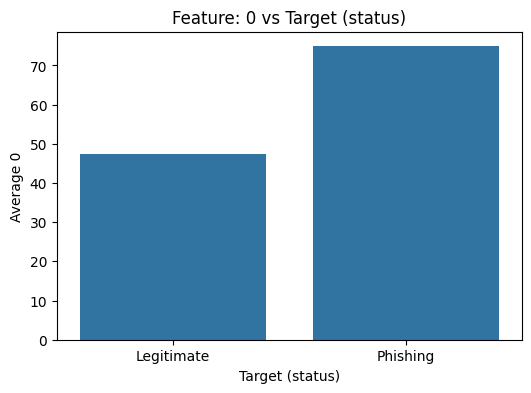

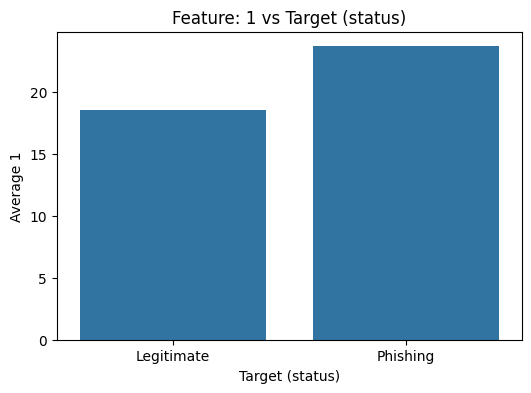

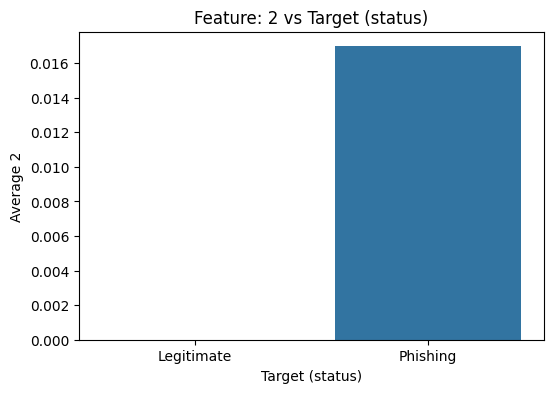

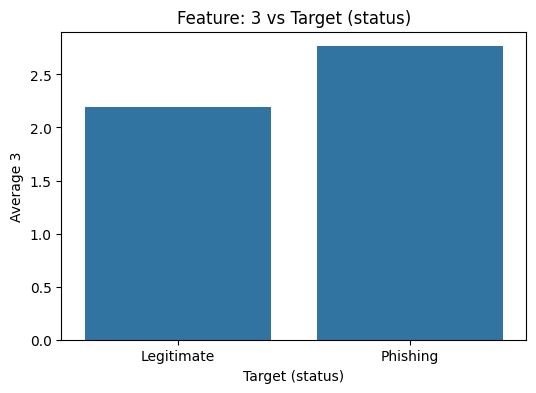

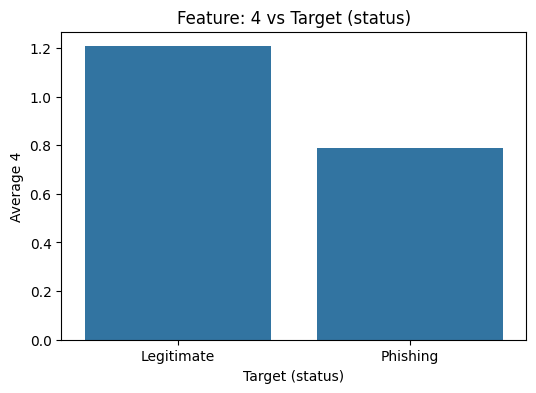

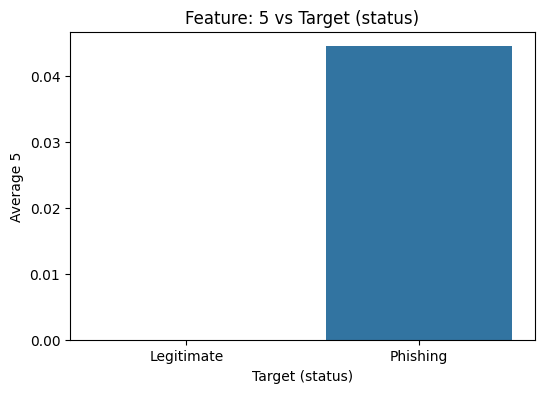

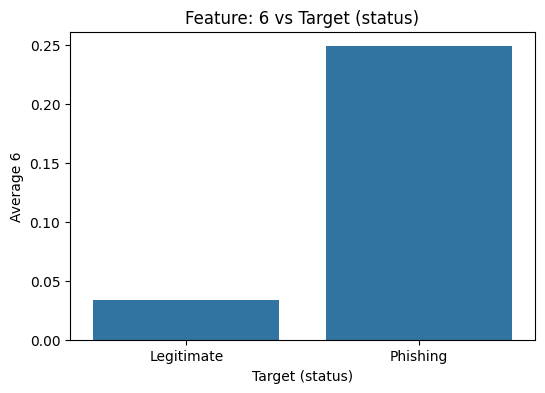

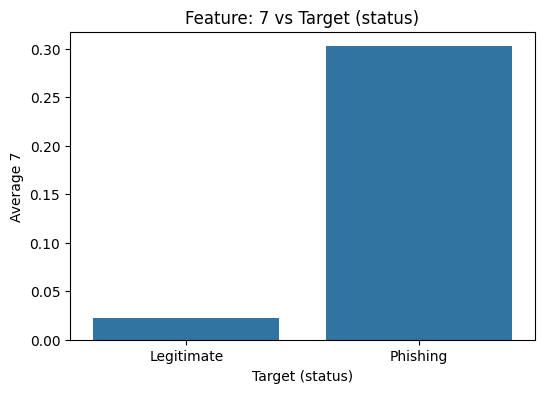

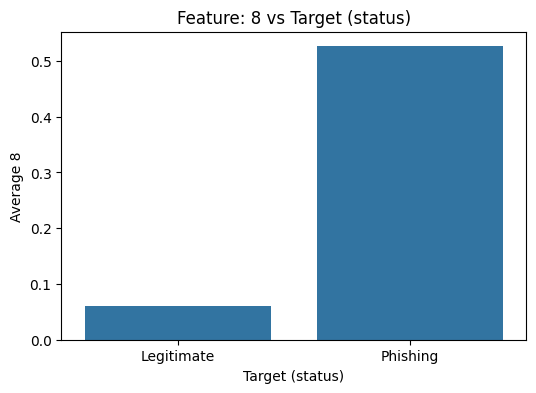

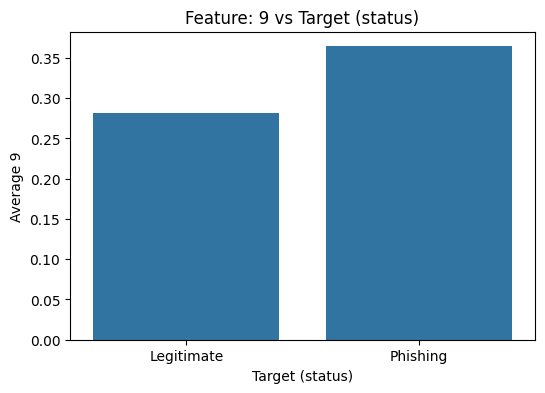

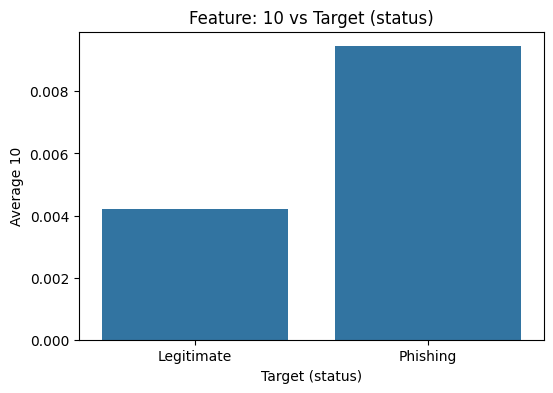

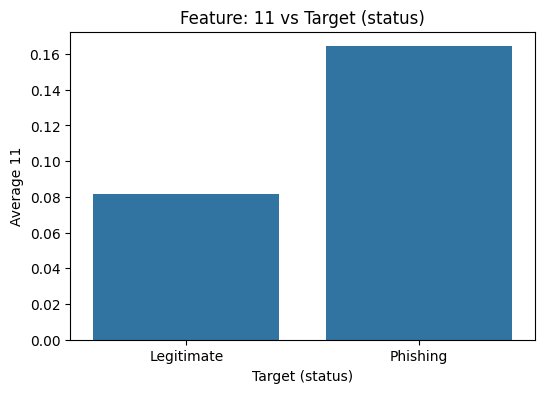

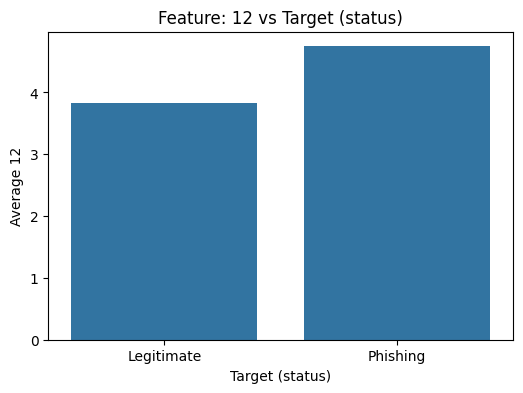

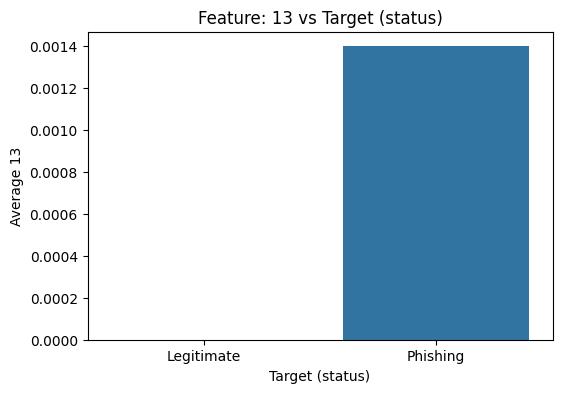

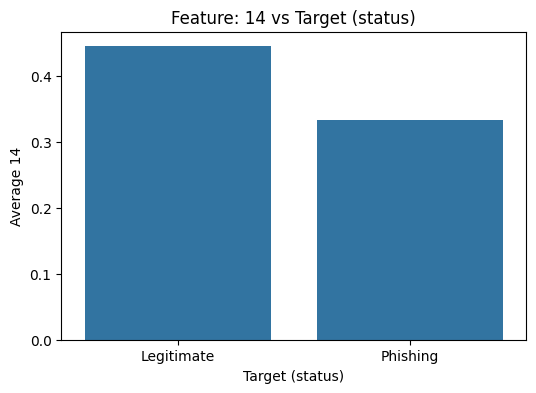

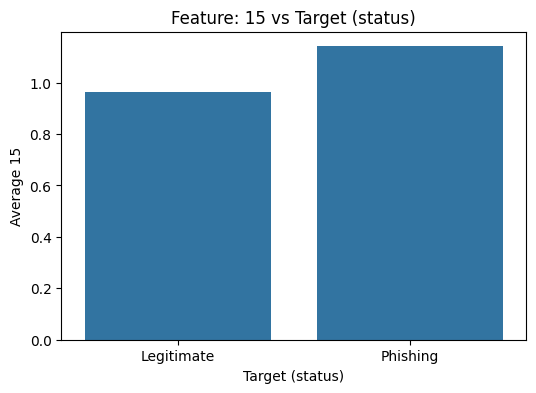

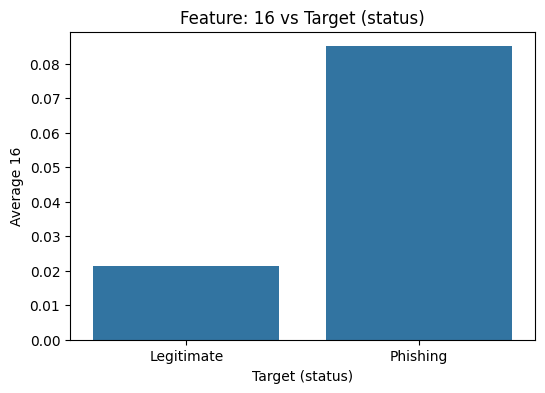

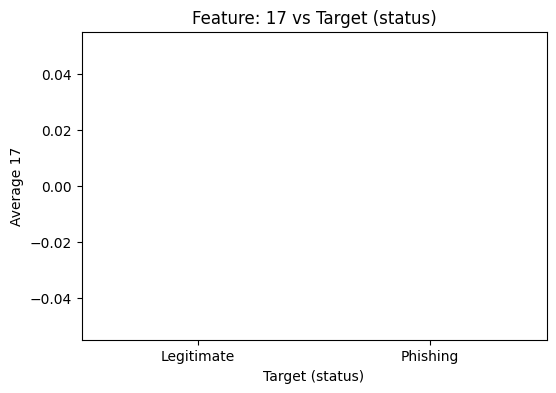

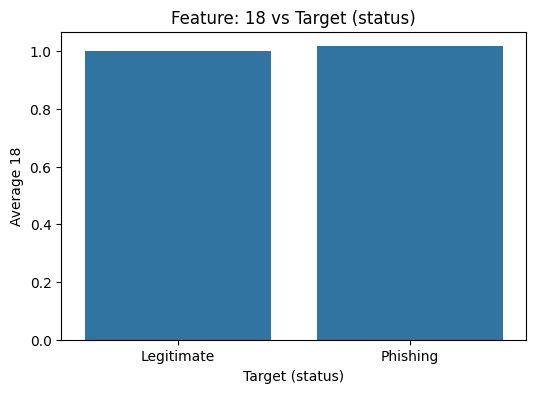

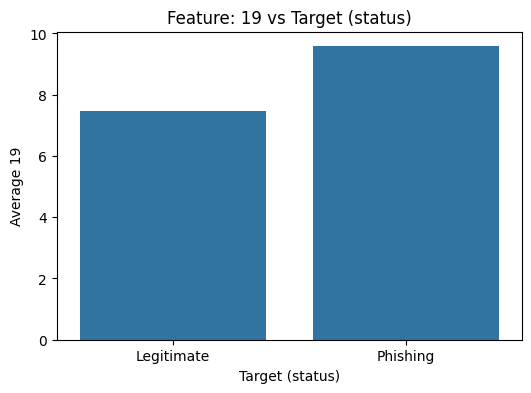

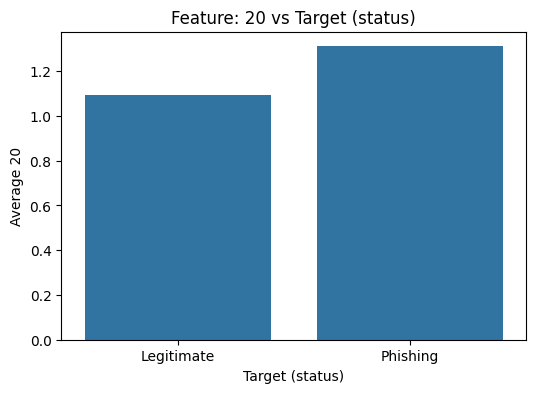

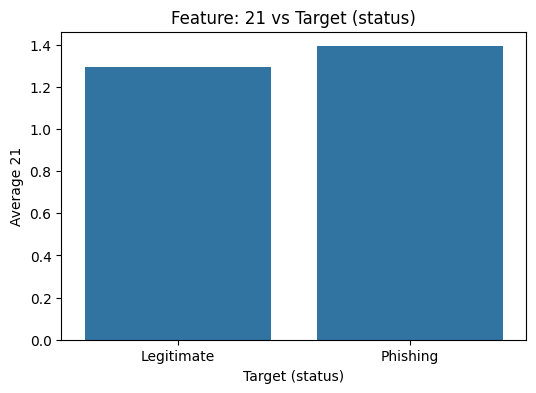

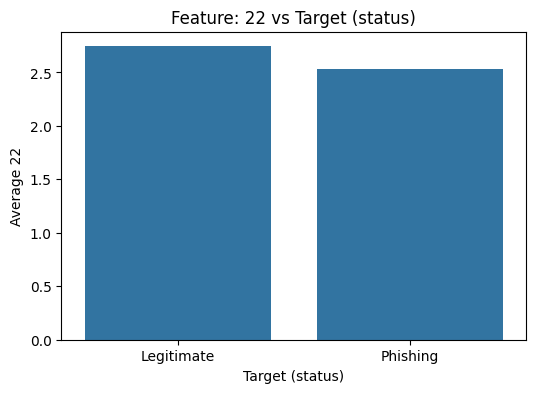

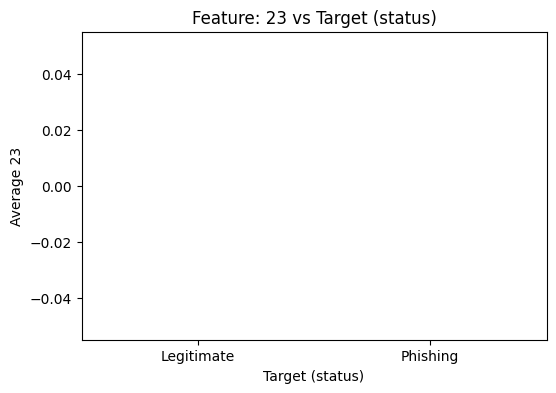

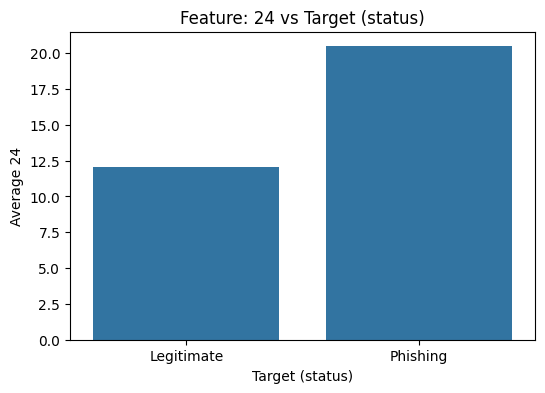

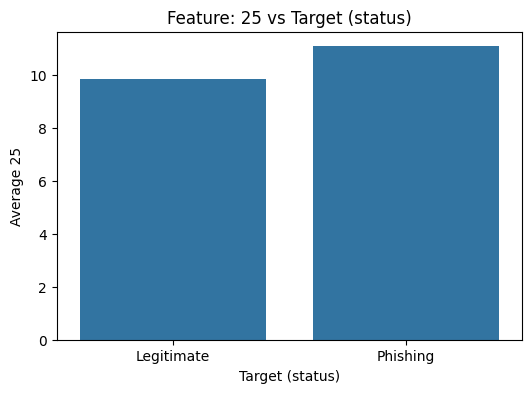

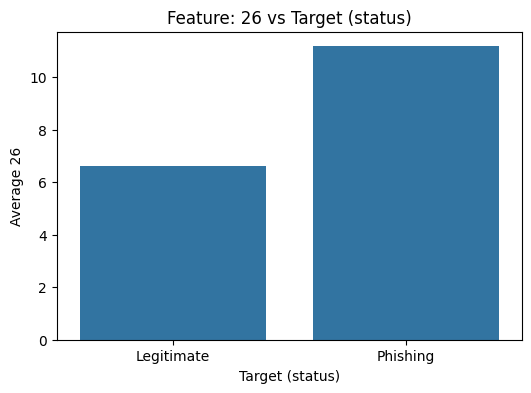

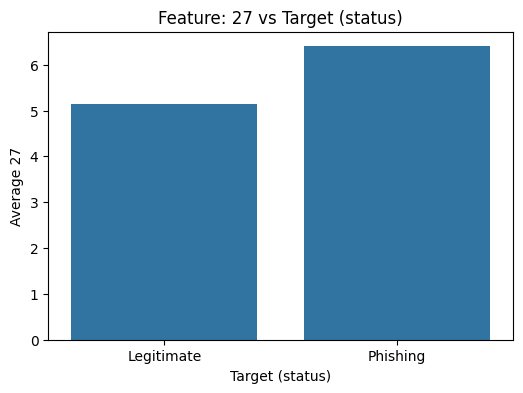

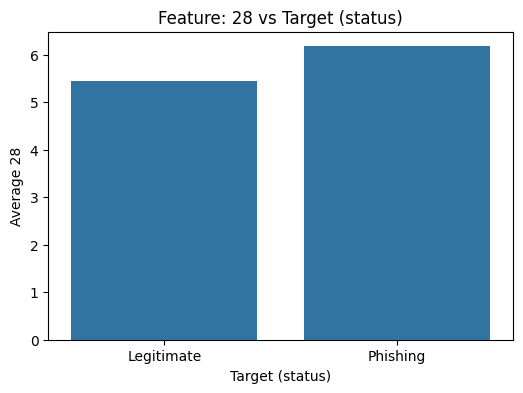

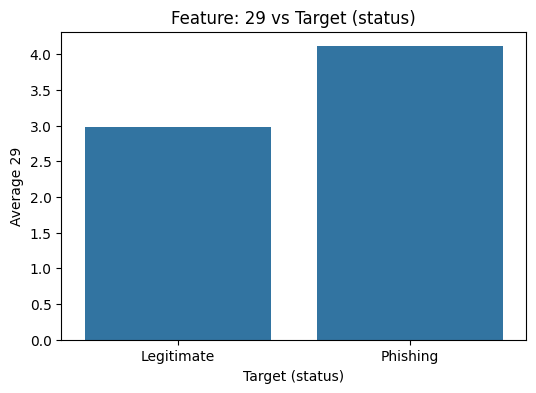

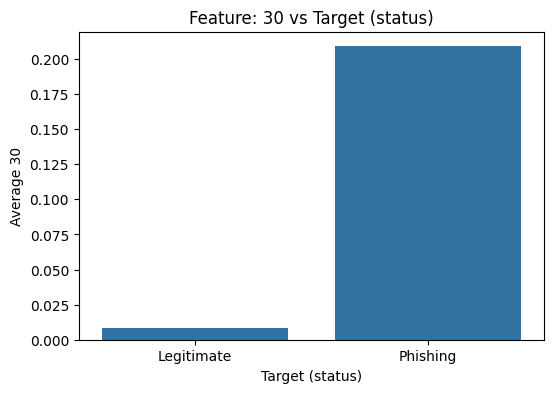

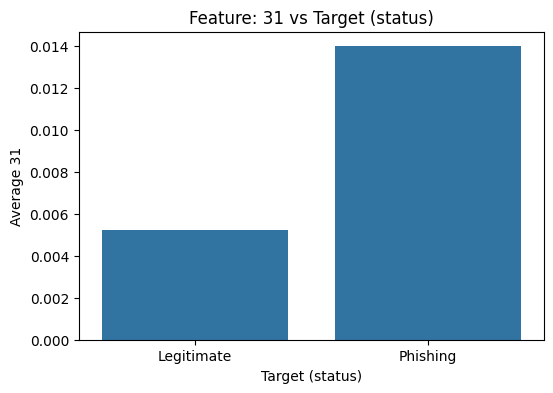

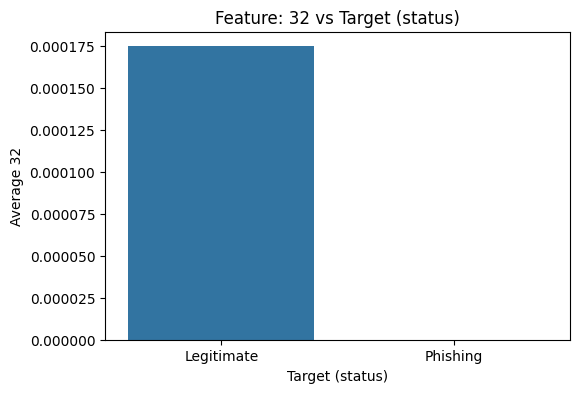

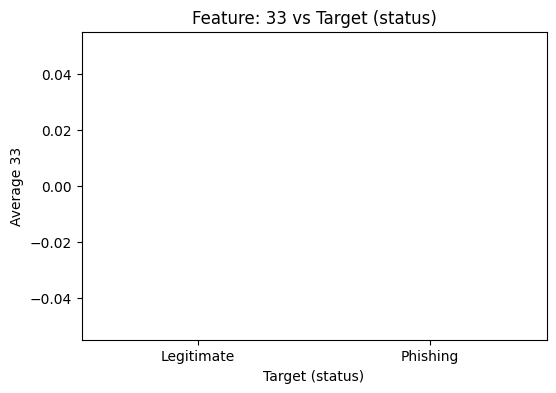

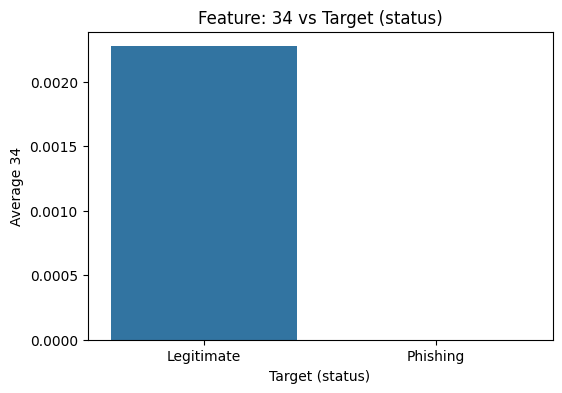

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('dataset_phishing.csv')  # Replace with the actual path of your dataset

# Step 2: Data Preprocessing
# Convert 'status' column to numerical (phishing: 1, legitimate: 0)
data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})
# Drop rows where 'status' column has NaN values
data = data.dropna(subset=['status'])

# Step 3: Feature extraction for URLs in the dataset
# Define a function to apply feature extraction to all rows
def extract_features_from_row(row):
    return extract_features(row['url'])

# Apply the feature extraction to all URLs in the dataset
X = data['url'].apply(extract_features)
X = pd.DataFrame(X.tolist())  # Convert to DataFrame for machine learning

# Option 1: Fill NaN with a default value (e.g., 0 or mean)
X.fillna(0, inplace=True)

# Option 2: Remove rows with NaN in features
X.dropna(inplace=True)

# Get the target variable
y = data['status']
# Combine features with the target variable (status)
df_clean = pd.concat([X, data['status']], axis=1)



import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'status' (target) and calculate mean values for each feature
grouped_data = df_clean.groupby('status').mean()

# Get the feature names (columns) excluding 'status'
features = df_clean.columns[:-1]  # assuming 'status' is the last column

# Plotting barplots for each feature vs target (status)
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=grouped_data.index, y=grouped_data[feature])
    plt.title(f'Feature: {feature} vs Target (status)')
    plt.xlabel('Target (status)')
    plt.ylabel(f'Average {feature}')
    plt.xticks([0, 1], ['Legitimate', 'Phishing'])
    plt.show()




In [9]:
from sklearn.model_selection import train_test_split
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 88.06%
              precision    recall  f1-score   support

  Legitimate       0.87      0.90      0.88      1157
    Phishing       0.89      0.87      0.88      1129

    accuracy                           0.88      2286
   macro avg       0.88      0.88      0.88      2286
weighted avg       0.88      0.88      0.88      2286

Confusion Matrix:
[[1036  121]
 [ 152  977]]


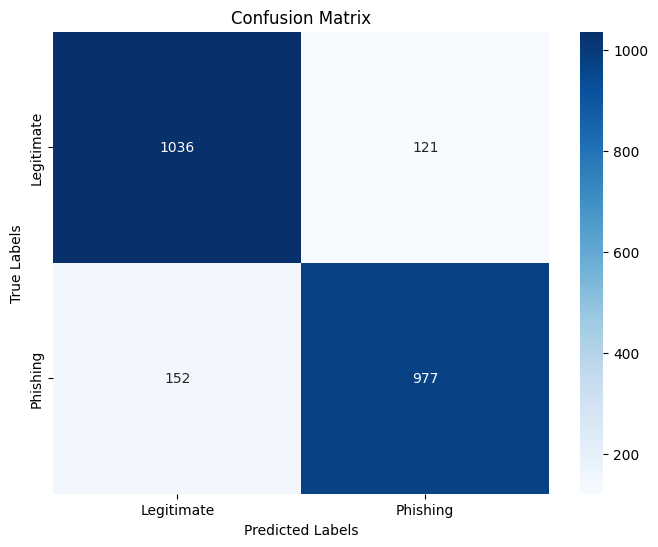

['phishing_detection_model.pkl']

In [10]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix# Step 5: Train the Random Forest model
phishing_detection_model = RandomForestClassifier(n_estimators=500, random_state=42)
phishing_detection_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = phishing_detection_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba = phishing_detection_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class



# Step 7: Save the trained model to a file
joblib.dump(phishing_detection_model, 'phishing_detection_model.pkl')

In [11]:
# Step 4: Train the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 6: Save the trained model
joblib.dump(model, 'phishing_detection_model.pkl')


Accuracy: 0.8770778652668416
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1157
           1       0.88      0.87      0.87      1129

    accuracy                           0.88      2286
   macro avg       0.88      0.88      0.88      2286
weighted avg       0.88      0.88      0.88      2286



['phishing_detection_model.pkl']

Accuracy: 88.06%
              precision    recall  f1-score   support

  Legitimate       0.87      0.90      0.88      1157
    Phishing       0.89      0.87      0.88      1129

    accuracy                           0.88      2286
   macro avg       0.88      0.88      0.88      2286
weighted avg       0.88      0.88      0.88      2286

Confusion Matrix:
[[1036  121]
 [ 152  977]]


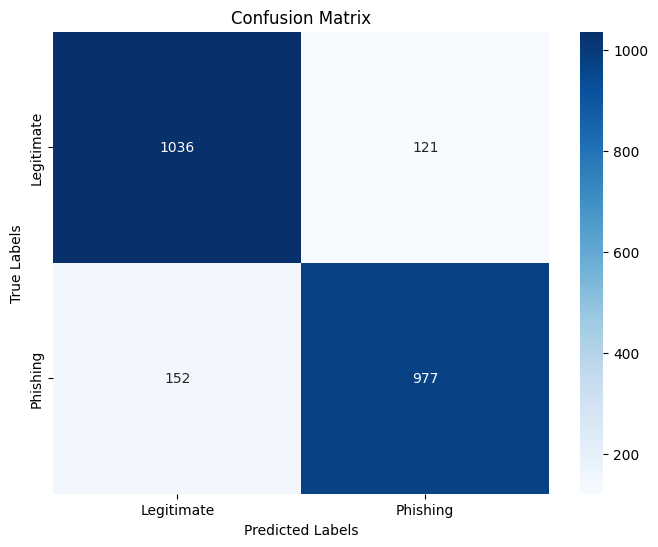

['phishing_detection_model.pkl']

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest model
phishing_detection_model = RandomForestClassifier(n_estimators=500, random_state=42)
phishing_detection_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = phishing_detection_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba = phishing_detection_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class



# Step 7: Save the trained model to a file
joblib.dump(phishing_detection_model, 'phishing_detection_model.pkl')


In [13]:
# Load the trained model
model = joblib.load('phishing_detection_model.pkl')

# Input a new URL
new_url = "http://hidayat.uz/928375602332311ochttp3A2F2F2Fws2FISAPIdllFM2MContact26item3B14276952031324requestePPd3DwolandgioielliPPP26qidQ-jlc@amahousse.com.html"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (Logistic Regression): 81.28%
              precision    recall  f1-score   support

  Legitimate       0.79      0.85      0.82      1157
    Phishing       0.84      0.77      0.80      1129

    accuracy                           0.81      2286
   macro avg       0.81      0.81      0.81      2286
weighted avg       0.81      0.81      0.81      2286

Confusion Matrix:
[[985 172]
 [256 873]]


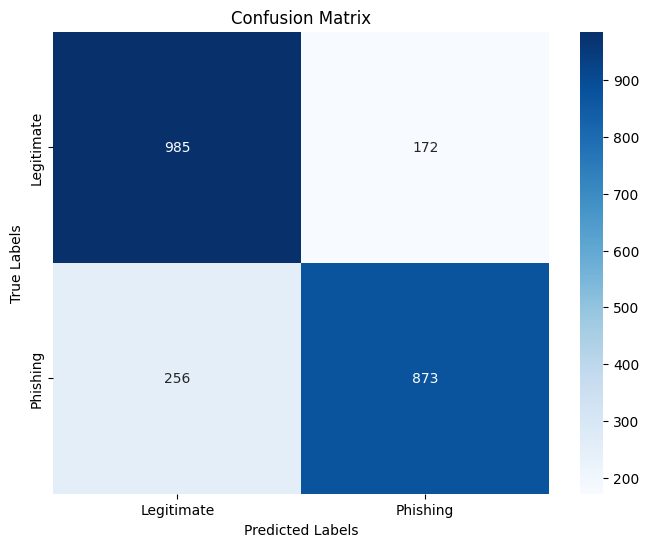

['phishing_detection_logistic_model.pkl']

In [14]:
from sklearn.linear_model import LogisticRegression

# Step 5: Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000, random_state=42)  # Increase max_iter if needed
logistic_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy (Logistic Regression): {accuracy_logistic * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_logistic, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class





# Step 7: Save the trained model to a file
joblib.dump(logistic_model, 'phishing_detection_logistic_model.pkl')


In [15]:
# Load the trained model
logistic_model = joblib.load('phishing_detection_logistic_model.pkl')

# Input a new URL
new_url = "http://bank-secure-login.com"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction =logistic_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (Decision Tree): 83.03%
              precision    recall  f1-score   support

  Legitimate       0.83      0.84      0.83      1157
    Phishing       0.83      0.82      0.83      1129

    accuracy                           0.83      2286
   macro avg       0.83      0.83      0.83      2286
weighted avg       0.83      0.83      0.83      2286

Confusion Matrix:
[[974 183]
 [205 924]]


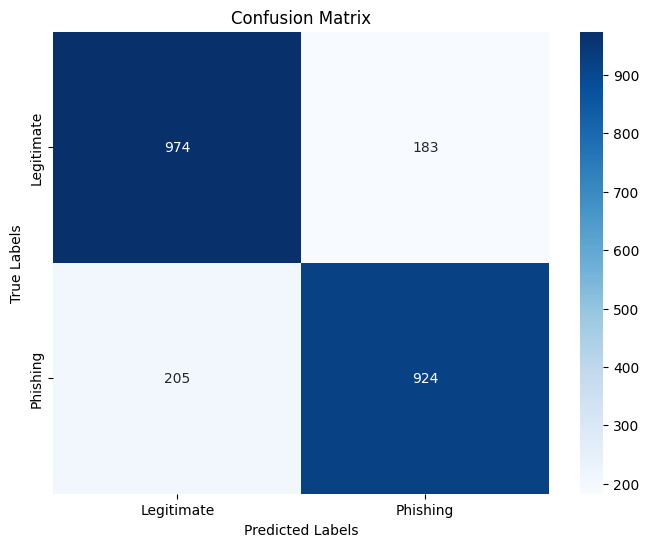

['phishing_detection_decision_tree_model.pkl']

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Step 5: Train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_tree, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_tree)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class



# Step 7: Save the trained model to a file
joblib.dump(decision_tree_model, 'phishing_detection_decision_tree_model.pkl')


In [17]:
# Load the trained Decision Tree model
decision_tree_model = joblib.load('phishing_detection_decision_tree_model.pkl')

# Input a new URL
new_url = "https://bit.ly/2E6D7J1"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = decision_tree_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (Naive Bayes): 72.40%
              precision    recall  f1-score   support

  Legitimate       0.65      0.97      0.78      1157
    Phishing       0.94      0.47      0.63      1129

    accuracy                           0.72      2286
   macro avg       0.79      0.72      0.70      2286
weighted avg       0.79      0.72      0.71      2286

Confusion Matrix:
[[1120   37]
 [ 594  535]]


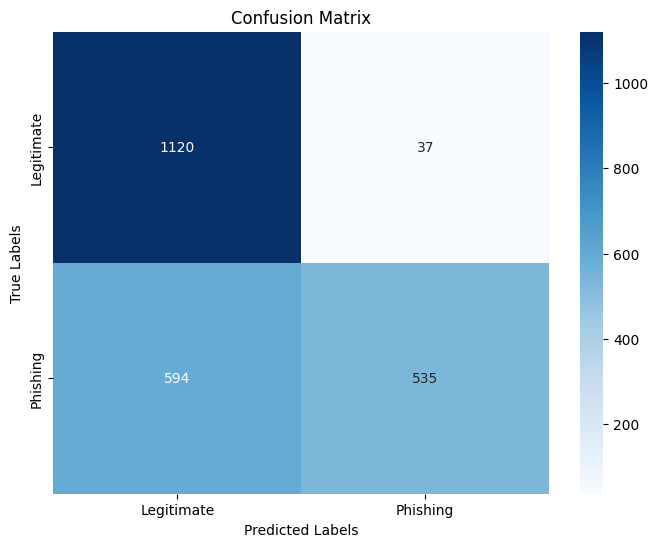

['phishing_detection_naive_bayes_model.pkl']

In [18]:
from sklearn.naive_bayes import GaussianNB  # Import the Gaussian Naive Bayes model

# Step 5: Train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_nb = naive_bayes_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_nb, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_nb)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_nb = naive_bayes_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Phishing)



# Step 7: Save the trained model to a file
joblib.dump(naive_bayes_model, 'phishing_detection_naive_bayes_model.pkl')


In [19]:
# Load the trained Naive Bayes model
naive_bayes_model = joblib.load('phishing_detection_naive_bayes_model.pkl')

# Input a new URL
new_url = "http://support-appleld.com.secureupdate.duilawyeryork.com/ap/78816aad8eccc21"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = naive_bayes_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (CART): 83.03%
              precision    recall  f1-score   support

  Legitimate       0.83      0.84      0.83      1157
    Phishing       0.83      0.82      0.83      1129

    accuracy                           0.83      2286
   macro avg       0.83      0.83      0.83      2286
weighted avg       0.83      0.83      0.83      2286

Confusion Matrix:
[[974 183]
 [205 924]]


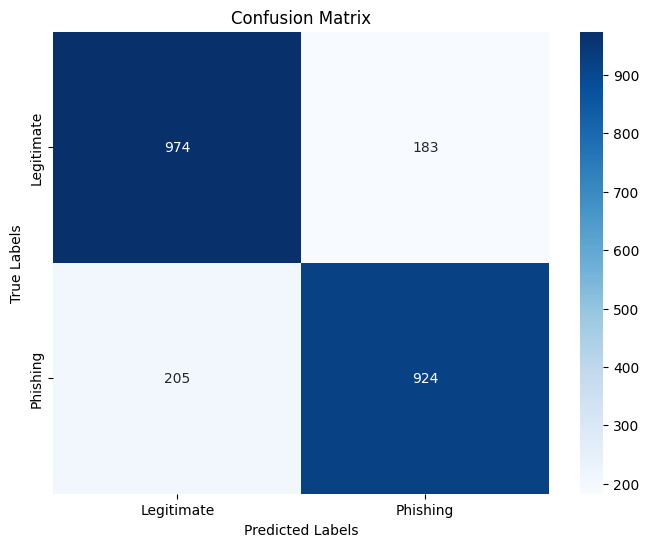

['phishing_detection_cart_model.pkl']

In [20]:
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier

# Step 5: Train the CART model
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_cart = cart_model.predict(X_test)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print(f'Accuracy (CART): {accuracy_cart * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_cart, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_cart)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_cart = cart_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Phishing)



# Step 7: Save the trained model to a file
joblib.dump(cart_model, 'phishing_detection_cart_model.pkl')


In [21]:
# Load the trained CART model
cart_model = joblib.load('phishing_detection_cart_model.pkl')

# Input a new URL
new_url = "http://support-appleld.com.secureupdate.duilawyeryork.com/ap/78816aad8eccc21"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = cart_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (Neural Network): 87.14%
              precision    recall  f1-score   support

  Legitimate       0.87      0.88      0.87      1157
    Phishing       0.88      0.86      0.87      1129

    accuracy                           0.87      2286
   macro avg       0.87      0.87      0.87      2286
weighted avg       0.87      0.87      0.87      2286

Confusion Matrix:
[[1019  138]
 [ 156  973]]


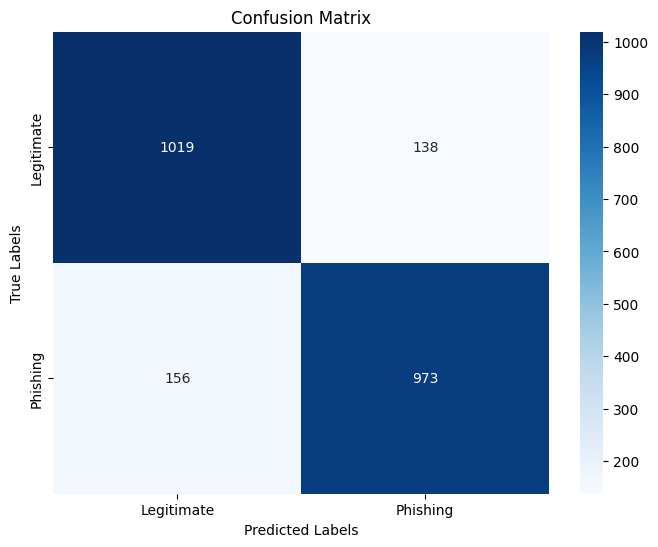

['phishing_detection_neural_network_model.pkl']

In [22]:
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron Classifier

# Step 5: Train the Neural Network model
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)  # You can adjust the hidden layer sizes and max_iter
neural_network_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_nn = neural_network_model.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Accuracy (Neural Network): {accuracy_nn * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_nn, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_nn)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_nn = neural_network_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Phishing)



# Step 7: Save the trained model to a file
joblib.dump(neural_network_model, 'phishing_detection_neural_network_model.pkl')


In [23]:
# Load the trained Neural Network model
neural_network_model = joblib.load('phishing_detection_neural_network_model.pkl')

# Input a new URL
new_url = "http://support-appleld.com.secureupdate.duilawyeryork.com/ap/78816aad8eccc21"
# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = neural_network_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Phishing


Accuracy (SVM): 72.92%
              precision    recall  f1-score   support

  Legitimate       0.67      0.92      0.77      1157
    Phishing       0.87      0.53      0.66      1129

    accuracy                           0.73      2286
   macro avg       0.77      0.73      0.72      2286
weighted avg       0.77      0.73      0.72      2286

Confusion Matrix:
[[1066   91]
 [ 528  601]]


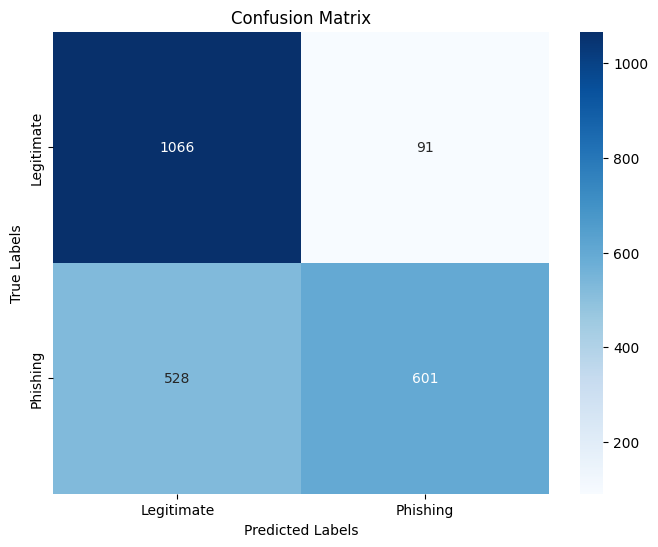

['phishing_detection_svm_model.pkl']

In [24]:
from sklearn.svm import SVC  # Import Support Vector Classifier

# Step 5: Train the SVM model
svm_model = SVC(probability=True,random_state=42)  # You can adjust parameters like kernel, C, etc. as needed
svm_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_svm, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_svm)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Step 6.1: Compute predicted probabilities for ROC curve
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Phishing)



# Step 7: Save the trained model to a file
joblib.dump(svm_model, 'phishing_detection_svm_model.pkl')


In [25]:
# Load the trained SVM model
svm_model = joblib.load('phishing_detection_svm_model.pkl')

# Input a new URL
new_url = "https://svecw.edu.in"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = svm_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Legitimate


In [26]:
!pip install xgboost

In [27]:
import xgboost as xgb
print(xgb.__version__) 


2.1.3


Accuracy (XGBoost): 87.45%
              precision    recall  f1-score   support

  Legitimate       0.86      0.90      0.88      1157
    Phishing       0.90      0.84      0.87      1129

    accuracy                           0.87      2286
   macro avg       0.88      0.87      0.87      2286
weighted avg       0.88      0.87      0.87      2286

Confusion Matrix:
[[1046  111]
 [ 176  953]]


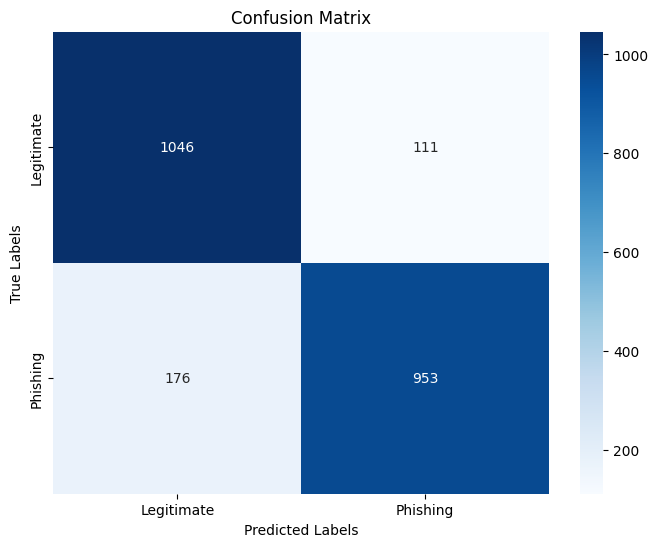

['phishing_detection_xgboost_model.pkl']

In [28]:
import joblib
import xgboost as xgb  # Import the XGBoost library

# Step 5: Train the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)  # You can adjust parameters as needed
xgboost_model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f'Accuracy (XGBoost): {accuracy_xgboost * 100:.2f}%')

# Display detailed classification report
print(classification_report(y_test, y_pred_xgboost, target_names=['Legitimate', 'Phishing']))

conf_matrix = confusion_matrix(y_test, y_pred_xgboost)
# Print the confusion matrix in matrix format
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Step 6.1: Compute predicted probabilities for ROC curve
y_proba_xgboost = xgboost_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (Phishing)



# Step 7: Save the trained model to a file
joblib.dump(xgboost_model, 'phishing_detection_xgboost_model.pkl')


In [29]:
# Load the trained XGBoost model
xgboost_model = joblib.load('phishing_detection_xgboost_model.pkl')

# Input a new URL
new_url = "http://www.arcanelegendsgame.com/"  # Replace with any URL

# Extract features for the new URL
new_url_features = extract_features(new_url)

# Predict whether the URL is phishing or legitimate
prediction = xgboost_model.predict([new_url_features])

# Output the result
if prediction[0] == 1:
    print("The URL is Phishing")
else:
    print("The URL is Legitimate")


The URL is Legitimate


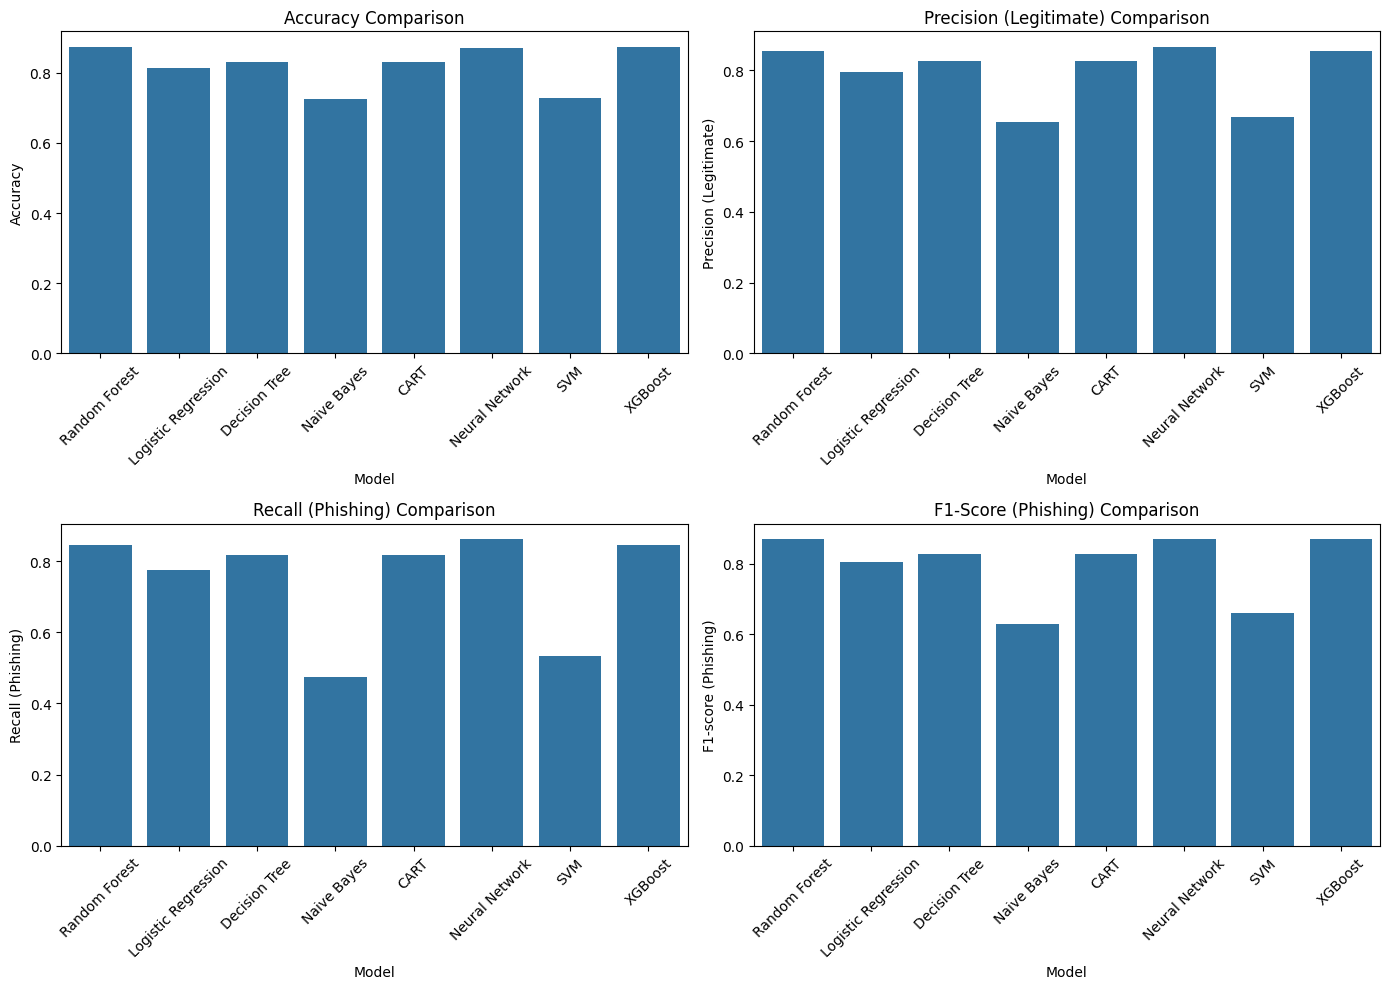

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your provided comparison data
comparison_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'CART',
              'Neural Network', 'SVM', 'XGBoost'],
    'Accuracy': [0.874453, 0.813648, 0.830271, 0.723972, 0.830271, 0.871391, 0.729221, 0.874453],
    'Precision (Legitimate)': [0.855974, 0.794521, 0.826124, 0.653442, 0.826124, 0.867234, 0.668758, 0.855974],
    'Recall (Legitimate)': [0.904062, 0.852204, 0.841832, 0.968021, 0.841832, 0.880726, 0.921348, 0.904062],
    'F1-score (Legitimate)': [0.879361, 0.822352, 0.833904, 0.780216, 0.833904, 0.873928, 0.774991, 0.879361],
    'Precision (Phishing)': [0.895677, 0.836364, 0.834688, 0.935315, 0.834688, 0.875788, 0.868497, 0.895677],
    'Recall (Phishing)': [0.844110, 0.774136, 0.818423, 0.473871, 0.818423, 0.861825, 0.532329, 0.844110],
    'F1-score (Phishing)': [0.869129, 0.804048, 0.826476, 0.629042, 0.826476, 0.868750, 0.660077, 0.869129]
}

# Convert the comparison data into a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Visualization of model comparisons
plt.figure(figsize=(14, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)

# Precision for Legitimate
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision (Legitimate)', data=comparison_df)
plt.title('Precision (Legitimate) Comparison')
plt.xticks(rotation=45)

# Recall for Phishing
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall (Phishing)', data=comparison_df)
plt.title('Recall (Phishing) Comparison')
plt.xticks(rotation=45)

# F1-Score for Phishing
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-score (Phishing)', data=comparison_df)
plt.title('F1-Score (Phishing) Comparison')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# List of model names and their respective predictions
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'CART', 'Neural Network', 'SVM', 'XGBoost']
model_predictions = [y_pred, y_pred_logistic, y_pred_tree, y_pred_nb, y_pred_cart, y_pred_nn, y_pred_svm, y_pred_xgboost]

# Initialize a list to store all the performance metrics
performance_data = []

# Loop through the models and their predictions
for model_name, y_pred in zip(model_names, model_predictions):
    report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing'], output_dict=True)

    # Append a dictionary for each model with its metrics
    performance_data.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Legitimate)': report['Legitimate']['precision'],
        'Recall (Legitimate)': report['Legitimate']['recall'],
        'F1-score (Legitimate)': report['Legitimate']['f1-score'],
        'Support (Legitimate)': report['Legitimate']['support'],
        'Precision (Phishing)': report['Phishing']['precision'],
        'Recall (Phishing)': report['Phishing']['recall'],
        'F1-score (Phishing)': report['Phishing']['f1-score'],
        'Support (Phishing)': report['Phishing']['support']
    })

# Create a DataFrame from the list of performance data
performance_df = pd.DataFrame(performance_data)

# To format it as a nice table in the output
# Display all columns and set float format for better readability
pd.set_option('display.max_columns', None)  # Ensures all columns are shown
pd.set_option('display.float_format', '{:.2f}'.format)  # Limits float precision for easier reading

# Display the DataFrame in a tabular format
print(performance_df.to_string(index=False))  # Convert DataFrame to string for clean tabular output without index


              Model  Accuracy  Precision (Legitimate)  Recall (Legitimate)  F1-score (Legitimate)  Support (Legitimate)  Precision (Phishing)  Recall (Phishing)  F1-score (Phishing)  Support (Phishing)
      Random Forest      0.88                    0.87                 0.90                   0.88               1157.00                  0.89               0.87                 0.88             1129.00
Logistic Regression      0.81                    0.79                 0.85                   0.82               1157.00                  0.84               0.77                 0.80             1129.00
      Decision Tree      0.83                    0.83                 0.84                   0.83               1157.00                  0.83               0.82                 0.83             1129.00
        Naive Bayes      0.72                    0.65                 0.97                   0.78               1157.00                  0.94               0.47                 0.63           